In [1]:
import pandas as pd
from neuralprophet import NeuralProphet

In [2]:
df = pd.read_csv('../example_data/wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [3]:
m = NeuralProphet()
metrics = m.fit(df, freq="D")
metrics.tail()

INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet - _auto_learning_rate: model_complexity 4.094344562222101
Epoch[40/40]: 100%|██████████| 40/40 [00:02<00:00, 18.55it/s, SmoothL1Loss=0.00692, MAE=0.427, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
35,0.006569,0.406852,0.0
36,0.006744,0.420245,0.0
37,0.006840,0.426465,0.0
38,0.007072,0.429739,0.0
39,0.006920,0.427268,0.0


In [4]:
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
future.tail()

,ds,y,t,y_scaled
3265,2017-01-15,NaN,1.121836,NaN
3266,2017-01-16,NaN,1.122173,NaN
3267,2017-01-17,NaN,1.122511,NaN
3268,2017-01-18,NaN,1.122848,NaN
3269,2017-01-19,NaN,1.123186,NaN


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat1']].tail()
# forecast.tail()

,ds,yhat1
3265,2017-01-15,8.491105
3266,2017-01-16,8.750351
3267,2017-01-17,8.495956
3268,2017-01-18,8.592334
3269,2017-01-19,8.158822


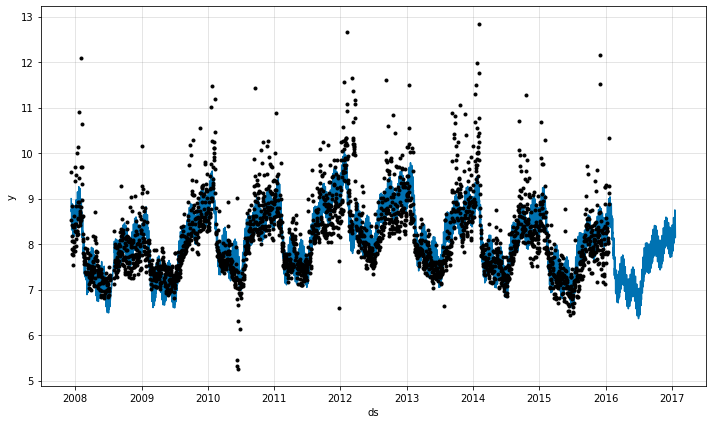

In [6]:
fig = m.plot(forecast)

In [7]:
# fig1 = m.plot_components(forecast, residuals=True)

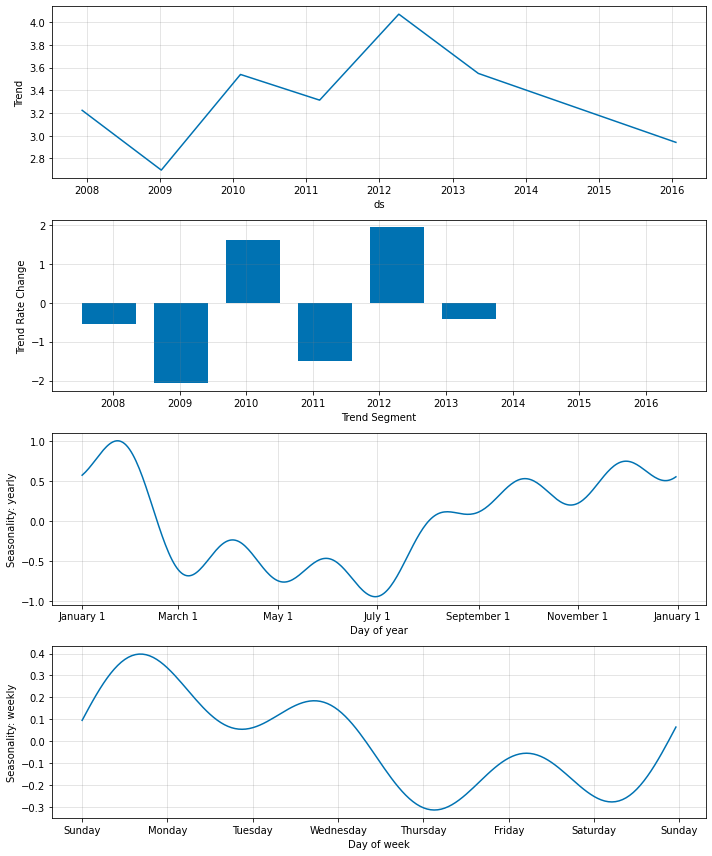

In [8]:
fig2 = m.plot_parameters()

# Adjusting Trend
## Automatic trendpoint selection

In [63]:
m = NeuralProphet(
    n_changepoints=30,
    trend_reg=1.00,
    changepoints_range=0.9,    
)
metrics = m.fit(df, freq="D")
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
forecast = m.predict(future)

INFO: nprophet.config - __post_init__: Note: Trend changepoint regularization is experimental.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet - _auto_learning_rate: model_complexity 5.736572297479192
Epoch[40/40]: 100%|██████████| 40/40 [00:02<00:00, 16.65it/s, SmoothL1Loss=0.00706, MAE=0.427, RegLoss=0.00303]


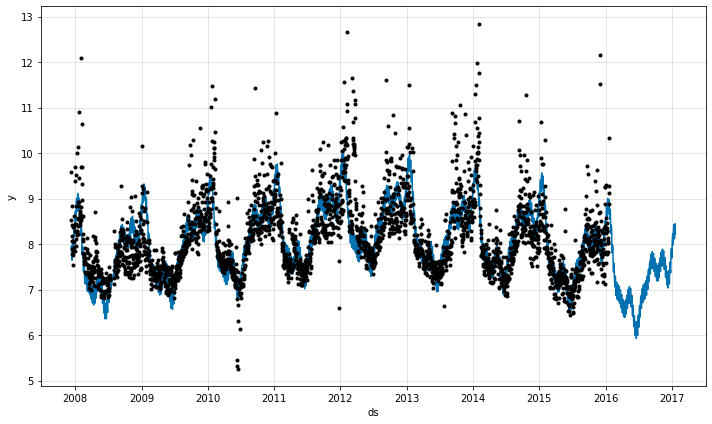

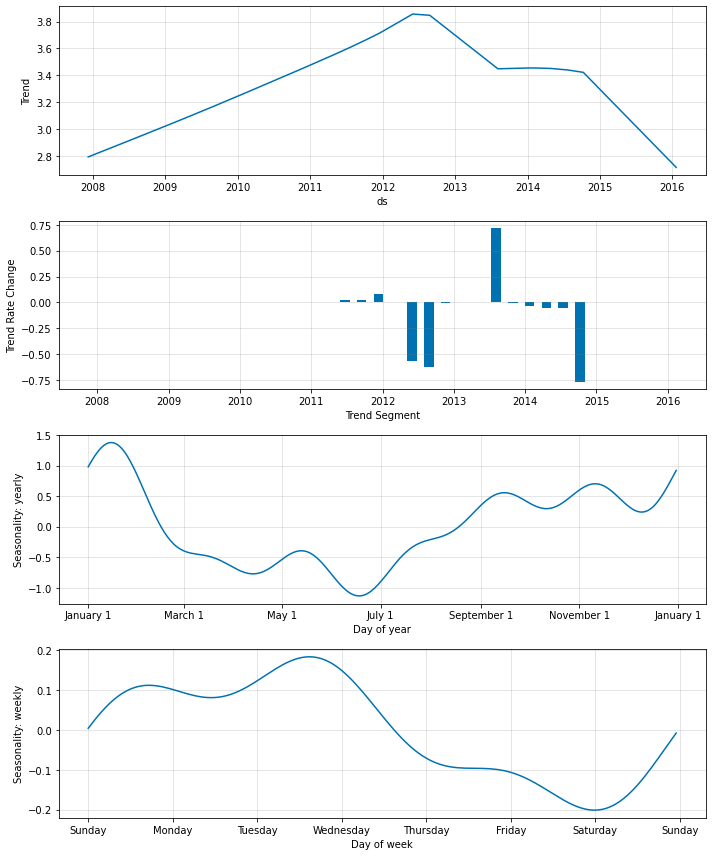

In [64]:
fig3 = m.plot(forecast)
fig4 = m.plot_parameters()

We can adjust the regularization strength to get more or less points with a non-zero rate change.
Note: for too high regularization strengths, the model fitting process becomes unstable.

In [65]:
m = NeuralProphet(
    n_changepoints=30,
    trend_reg=0.5,
    changepoints_range=0.9,    
)
metrics = m.fit(df, freq="D")
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
forecast = m.predict(future)

INFO: nprophet.config - __post_init__: Note: Trend changepoint regularization is experimental.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet - _auto_learning_rate: model_complexity 5.736572297479192
Epoch[40/40]: 100%|██████████| 40/40 [00:02<00:00, 17.11it/s, SmoothL1Loss=0.00776, MAE=0.462, RegLoss=0.0056] 


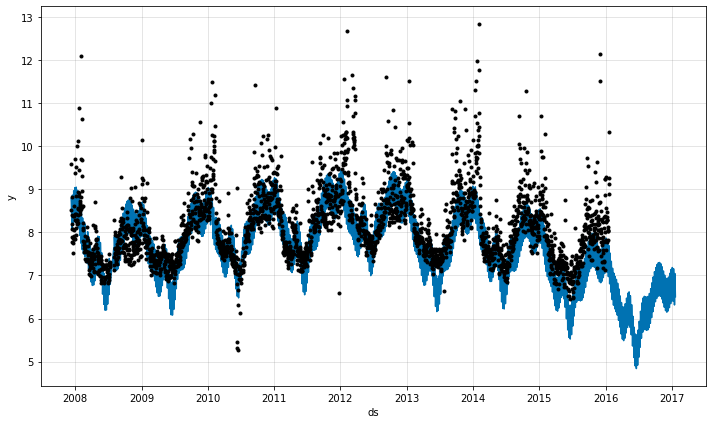

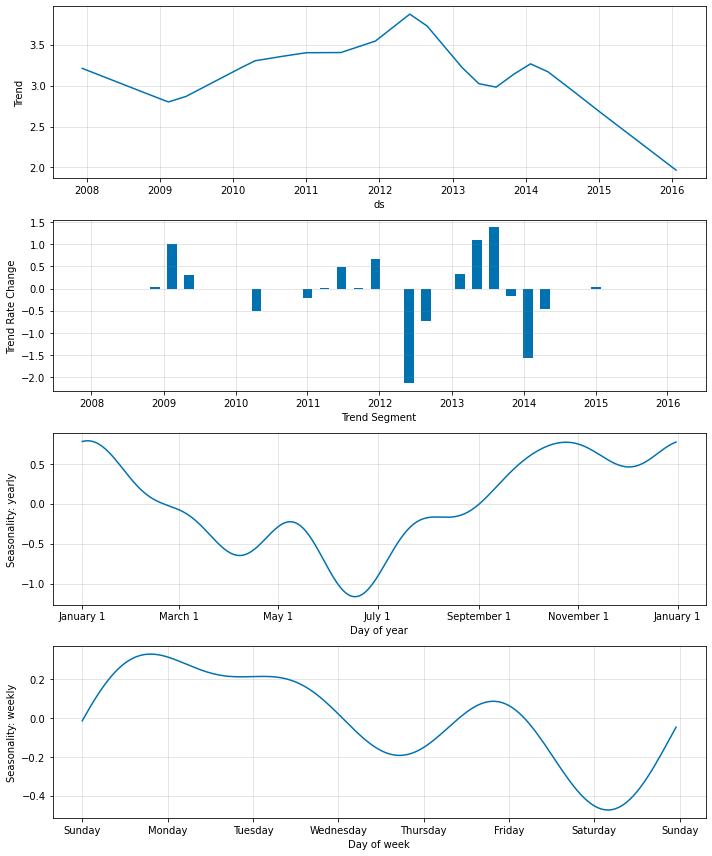

In [66]:
fig3 = m.plot(forecast)
fig4 = m.plot_parameters()

In [61]:
m = NeuralProphet(
    n_changepoints=30,
    trend_reg=2.0,
    changepoints_range=0.9,   
)
metrics = m.fit(df, freq="D")
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
forecast = m.predict(future)

INFO: nprophet.config - __post_init__: Note: Trend changepoint regularization is experimental.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet - _auto_learning_rate: model_complexity 5.736572297479192
Epoch[40/40]: 100%|██████████| 40/40 [00:02<00:00, 17.42it/s, SmoothL1Loss=0.00746, MAE=0.442, RegLoss=0.00186]


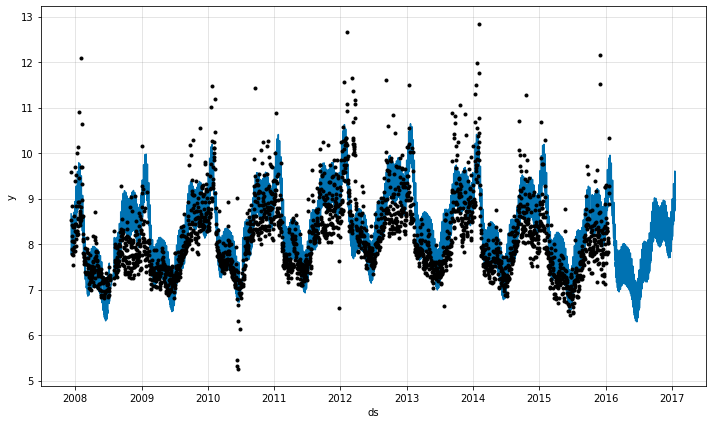

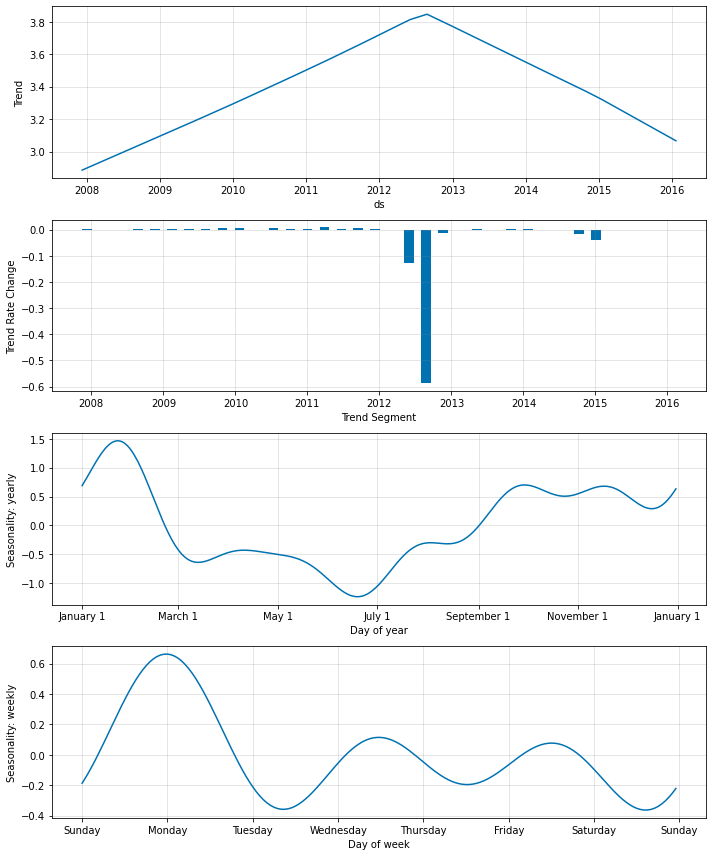

In [62]:
fig3 = m.plot(forecast)
fig4 = m.plot_parameters()